>### 简单线性回归

In [1]:
from pandas import read_csv
data = read_csv('D:\\PDM\\4.1\data.csv')

Populating the interactive namespace from numpy and matplotlib


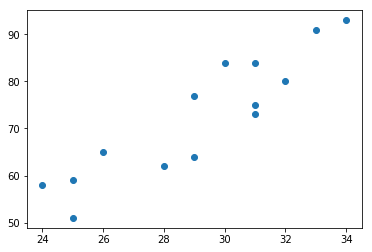

In [2]:
%pylab inline
from matplotlib import pyplot as plt

plt.scatter(data.广告投入,data.销售额)

In [3]:
#相关系数矩阵
data.corr()

,广告投入,销售额
广告投入,1.000000,0.906923
销售额,0.906923,1.000000


In [4]:
from sklearn.linear_model import LinearRegression
#建立模型
IrModel = LinearRegression()

In [5]:
x = data[['广告投入']]
y = data[['销售额']]

In [6]:
#训练模型
IrModel.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [7]:
#模型评估
IrModel.score(x,y)

0.82250928811669455

In [8]:
#模型预测
IrModel.predict([[50],[40],[30]])

array([[ 150.53303965],
       [ 113.15418502],
       [  75.7753304 ]])

In [9]:
#截距
alpha = IrModel.intercept_[0]

In [10]:
#相关系数
beta = IrModel.coef_[0][0]

In [11]:
alpha

-36.361233480176139

In [12]:
beta

3.7378854625550635

In [13]:
#预测值：a + bx
alpha + beta*numpy.array([50,40,30])

array([ 150.53303965,  113.15418502,   75.7753304 ])

>### 多重线性回归

In [16]:
data = read_csv('D:\\PDM\\4.2\data.csv')
data

,店铺的面积,距离最近的车站,月营业额
0,10,80,469
1,8,0,366
2,8,200,371
3,5,200,208
4,7,300,246
5,8,230,297
6,7,40,363
7,9,0,436
8,6,330,198
9,9,180,364


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001ED2156F3C8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001ED21F99550>]], dtype=object)

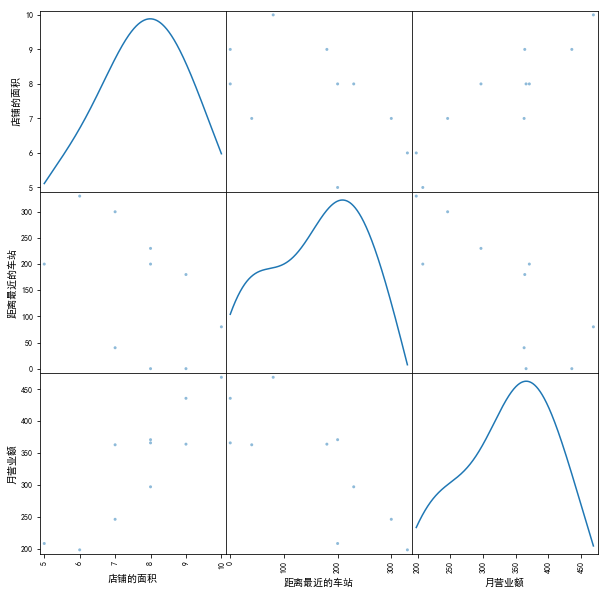

In [23]:
from pandas.plotting import scatter_matrix

font = {
    'family':'SimHei'
}
matplotlib.rc('font',**font)

scatter_matrix(
    data[["店铺的面积","距离最近的车站","月营业额"]],
    figsize=(10,10),diagonal='kde')

In [34]:
data.corr()

,店铺的面积,距离最近的车站,月营业额
店铺的面积,1.000000,-0.492155,0.892385
距离最近的车站,-0.492155,1.000000,-0.775083
月营业额,0.892385,-0.775083,1.000000


In [26]:
x = data[["店铺的面积","距离最近的车站"]]
y = data[["月营业额"]]
IrModel = LinearRegression()

In [28]:
IrModel.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [30]:
IrModel.score(x,y)

0.94523585268171084

In [31]:
IrModel.predict([[10,110],[20,110]])

array([[ 442.96160353],
       [ 858.09638609]])

In [33]:
IrModel.predict([[10,110]])

array([[ 442.96160353]])

In [35]:
IrModel.intercept_

array([ 65.32391639])

In [36]:
IrModel.coef_

array([[ 41.51347826,  -0.34088269]])

>### 一元非线性回归

In [41]:
data = read_csv('D:/PDM/4.3/data.csv')

In [42]:
x = data[["等级"]]
y = data[["资源"]]

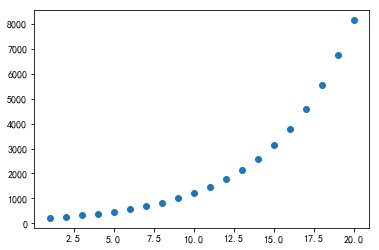

In [43]:
plt.scatter(x,y)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001ED22F623C8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001ED23252C18>]], dtype=object)

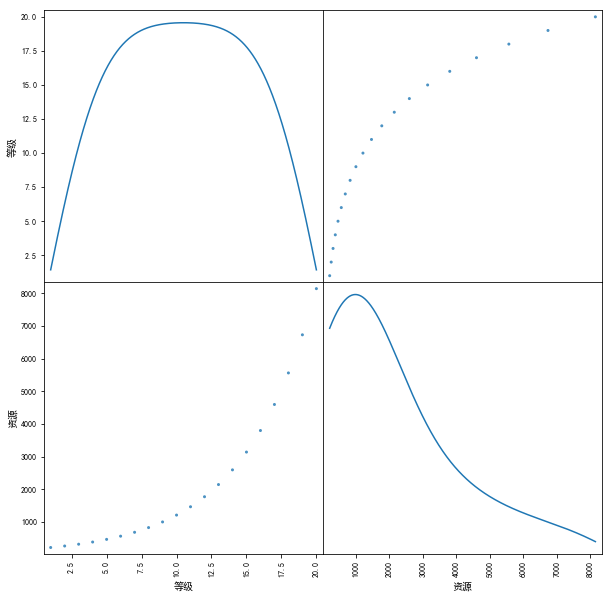

In [48]:
scatter_matrix(
    data[["等级", "资源"]], 
    alpha=0.8, figsize=(10, 10), diagonal='kde'
)

In [49]:
from sklearn.preprocessing import PolynomialFeatures
x

,等级
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [51]:
pf = PolynomialFeatures(degree=2)
x2fit = pf.fit_transform(x)

In [52]:
x2fit

array([[   1.,    1.,    1.],
       [   1.,    2.,    4.],
       [   1.,    3.,    9.],
       [   1.,    4.,   16.],
       [   1.,    5.,   25.],
       [   1.,    6.,   36.],
       [   1.,    7.,   49.],
       [   1.,    8.,   64.],
       [   1.,    9.,   81.],
       [   1.,   10.,  100.],
       [   1.,   11.,  121.],
       [   1.,   12.,  144.],
       [   1.,   13.,  169.],
       [   1.,   14.,  196.],
       [   1.,   15.,  225.],
       [   1.,   16.,  256.],
       [   1.,   17.,  289.],
       [   1.,   18.,  324.],
       [   1.,   19.,  361.],
       [   1.,   20.,  400.]])

In [53]:
IrModel = LinearRegression()
IrModel.fit(x2fit,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [54]:
IrModel.score(x2fit,y)

0.98438623929845115

In [57]:
x2predict = pf.fit_transform([[21],[22],[23]])
IrModel.predict(x2predict)

array([[  8449.29298246],
       [  9490.99924812],
       [ 10594.83697881]])

In [58]:
x2predict

array([[   1.,   21.,  441.],
       [   1.,   22.,  484.],
       [   1.,   23.,  529.]])